In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

In [35]:
sonar_data = pd.read_csv("sonar.csv" , header = None) 

In [76]:
data = shuffle(sonar_data)

In [77]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
173,0.0329,0.0216,0.0386,0.0627,0.1158,0.1482,0.2054,0.1605,0.2532,0.2672,...,0.0095,0.0151,0.0059,0.0015,0.0053,0.0016,0.0042,0.0053,0.0074,M
152,0.0131,0.0201,0.0045,0.0217,0.0230,0.0481,0.0742,0.0333,0.1369,0.2079,...,0.0168,0.0086,0.0045,0.0062,0.0065,0.0030,0.0066,0.0029,0.0053,M
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R
16,0.0352,0.0116,0.0191,0.0469,0.0737,0.1185,0.1683,0.1541,0.1466,0.2912,...,0.0346,0.0158,0.0154,0.0109,0.0048,0.0095,0.0015,0.0073,0.0067,R
168,0.0015,0.0186,0.0289,0.0195,0.0515,0.0817,0.1005,0.0124,0.1168,0.1476,...,0.0108,0.0075,0.0089,0.0036,0.0029,0.0013,0.0010,0.0032,0.0047,M


In [78]:
data.shape

(208, 61)

In [79]:
y_lables = data.iloc[:,-1]
y_lables = y_lables.replace({"R":"1","M":"0"})
y_lables

173    0
152    0
9      1
16     1
168    0
      ..
183    0
134    0
107    0
0      1
102    0
Name: 60, Length: 208, dtype: object

In [80]:
x_data = data.iloc[:,0:60]

In [81]:
x_data.shape

(208, 60)

In [82]:
x_data.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
173,0.0329,0.0216,0.0386,0.0627,0.1158,0.1482,0.2054,0.1605,0.2532,0.2672,...,0.0104,0.0095,0.0151,0.0059,0.0015,0.0053,0.0016,0.0042,0.0053,0.0074
152,0.0131,0.0201,0.0045,0.0217,0.0230,0.0481,0.0742,0.0333,0.1369,0.2079,...,0.0111,0.0168,0.0086,0.0045,0.0062,0.0065,0.0030,0.0066,0.0029,0.0053
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0118,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040
16,0.0352,0.0116,0.0191,0.0469,0.0737,0.1185,0.1683,0.1541,0.1466,0.2912,...,0.0426,0.0346,0.0158,0.0154,0.0109,0.0048,0.0095,0.0015,0.0073,0.0067
168,0.0015,0.0186,0.0289,0.0195,0.0515,0.0817,0.1005,0.0124,0.1168,0.1476,...,0.0045,0.0108,0.0075,0.0089,0.0036,0.0029,0.0013,0.0010,0.0032,0.0047


In [83]:
x_train=x_data.iloc[:int(x_data.shape[0]*.70),:]
x_train.shape

(145, 60)

In [84]:
x_test=x_data.iloc[int(x_data.shape[0]*.70):,:]
x_test.shape

(63, 60)

In [85]:
y_train=y_lables[:145].astype('float32')
y_train.shape

(145,)

In [86]:
y_test=y_lables[145:].astype('float32')
y_test.shape

(63,)

 Normalizing the data

In [87]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
x_test -= mean
x_test /= std

Model definition

In [88]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(60, activation='relu',input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# K-fold validation

In [89]:
k=4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores = []

In [90]:
for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
                          [x_train[:i * num_val_samples],
                          x_train[(i + 1) * num_val_samples:]],
                          axis=0)
    partial_train_targets = np.concatenate(
                          [y_train[:i * num_val_samples],
                          y_train[(i + 1) * num_val_samples:]],
                          axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,  epochs = num_epochs, batch_size=1,verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Running this with num_epochs = 100 yields the following results:

In [91]:
all_scores

[0.75, 0.9166666865348816, 0.8333333134651184, 0.8055555820465088]

In [92]:
np.mean(all_scores)

0.8263888955116272

 Saving the validation logs at each fold

In [93]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [x_train[:i * num_val_samples],
     
     
    x_train[(i + 1) * num_val_samples:]],  axis=0)
    partial_train_targets = np.concatenate(
    [y_train[:i * num_val_samples],
    y_train[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['accuracy']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [94]:
all_mae_histories

[[0.6880733966827393,
  0.8165137767791748,
  0.8899082541465759,
  0.9082568883895874,
  0.9357798099517822,
  0.9724770784378052,
  0.9816513657569885,
  0.9816513657569885,
  0.9908257126808167,
  0.9816513657569885,
  0.9908257126808167,
  1.0,
  1.0,
  0.9908257126808167,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
 

In [95]:
np.mean(all_mae_histories)

0.9982844038009644

Building the history of successive mean K-fold validation scores

In [96]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [97]:
average_mae_history

[0.6467889845371246,
 0.8004587292671204,
 0.8830275237560272,
 0.9220183491706848,
 0.9541284441947937,
 0.9701834917068481,
 0.9885321259498596,
 0.9908256977796555,
 0.9954128563404083,
 0.9954128414392471,
 0.9977064281702042,
 1.0,
 1.0,
 0.9977064281702042,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

Plotting validation scores

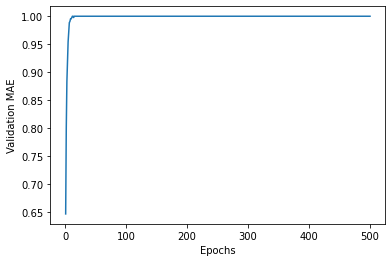

In [98]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Plotting validation scores, excluding the first 10 data points

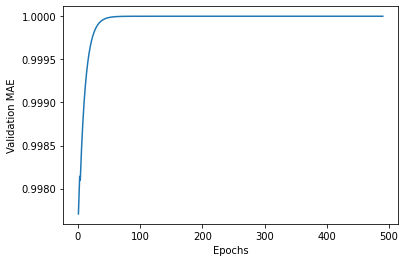

In [99]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
        else:
          smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [100]:
model = build_model()
model.fit(x_train, y_train,epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(x_train, y_train)

5/5 [==============================] - 0s 5ms/step - loss: 8.8638e-09 - accuracy: 1.0000


In [101]:
 test_mae_score

1.0

In [102]:
test_mse_score

8.863815459392299e-09